# Crime Trend Predictions Using ARIMA and VAR Models  

In this analysis, we employ **ARIMA** and **VAR** models to forecast crime trends across India. ARIMA focuses on predicting future crime rates based on historical data for individual states or districts, while VAR captures the interdependencies among different crime categories, offering both state-level and national insights. Together, these models provide a robust framework for understanding and projecting crime trends, aiding in data-driven decision-making for policy and planning.  


# Predicting Future Crimes Using ARIMA (2014-2023)

## Overview

In this section, we employ the **ARIMA (AutoRegressive Integrated Moving Average)** model to forecast crime trends for the years 2014 to 2023. ARIMA is a robust statistical method designed for time series forecasting, effectively capturing trends and seasonality in data.

## ARIMA Components

- **AutoRegression (AR):** Models the relationship between an observation and its lagged values.
- **Integrated (I):** Applies differencing to make the time series stationary.
- **Moving Average (MA):** Models the relationship between an observation and the residual errors from a lagged moving average.

---

## Preprocessing: Stationarity Check and Differencing

To ensure accurate forecasts, we performed the following preprocessing steps:

1. **Stationarity Check:**
   - Conducted the **Augmented Dickey-Fuller (ADF) test** to assess stationarity.
   - Observed that raw crime data exhibited non-stationary behavior, with trends and seasonality affecting the series.

2. **Differencing:**
   - Applied differencing techniques to stabilize the mean and remove trends, transforming the data into a stationary time series suitable for ARIMA modeling.
   - Ensured that the differenced series passed the stationarity test with consistent mean and variance.


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('crimes_cleaned.csv')

# Create backup columns to store the original 'STATE/UT' and 'DISTRICT' values
data['STATE/UT_original'] = data['STATE/UT']
data['DISTRICT_original'] = data['DISTRICT']



# Initialize the label encoder to convert categorical data into numeric labels
label_encoder = LabelEncoder()

# Encode 'STATE/UT' and 'DISTRICT' columns with numeric labels
data['STATE/UT'] = label_encoder.fit_transform(data['STATE/UT'])
data['DISTRICT'] = label_encoder.fit_transform(data['DISTRICT'])

# Configure pandas to display all rows (avoids truncation of output)
pd.set_option('display.max_rows', None)

# Print the comparison of original and encoded values for 'STATE/UT' and 'DISTRICT'
print("Original vs. Encoded Values for STATE/UT and DISTRICT:")
print(data[['STATE/UT_original', 'STATE/UT', 'DISTRICT_original', 'DISTRICT']])

# Reset the display options to default (useful after the operation)
pd.reset_option('display.max_rows')


Original vs. Encoded Values for STATE/UT and DISTRICT:
      STATE/UT_original  STATE/UT     DISTRICT_original  DISTRICT
0        ANDHRA PRADESH         2              ADILABAD         3
1        ANDHRA PRADESH         2             ANANTAPUR        31
2        ANDHRA PRADESH         2              CHITTOOR       157
3        ANDHRA PRADESH         2              CUDDAPAH       175
4        ANDHRA PRADESH         2             CYBERABAD       177
5        ANDHRA PRADESH         2         EAST GODAVARI       225
6        ANDHRA PRADESH         2         GUNTAKAL RLY.       284
7        ANDHRA PRADESH         2                GUNTUR       285
8        ANDHRA PRADESH         2          GUNTUR URBAN       286
9        ANDHRA PRADESH         2        HYDERABAD CITY       313
10       ANDHRA PRADESH         2            KARIMNAGAR       398
11       ANDHRA PRADESH         2               KHAMMAM       412
12       ANDHRA PRADESH         2               KRISHNA       452
13       ANDHRA PRADE

### Customizing Predictions for a Specific State

Select a code from the list of states provided and edit it in the code. The ARIMA model will generate predictions for the chosen state, displaying the forecasted crime trends for the years 2014 to 2023. This customization allows you to focus on the state of your interest, providing localized insights into crime trends.  


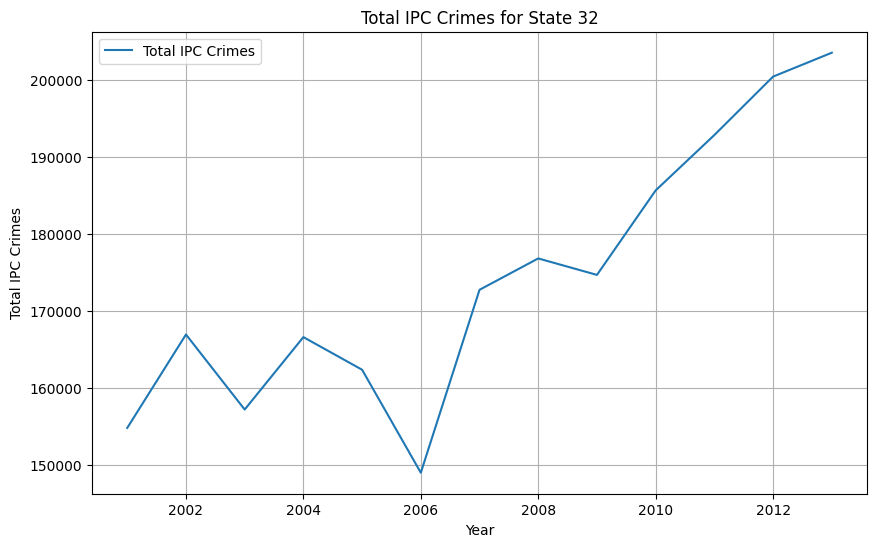

ADF Statistic: 0.9160292436081245
p-value: 0.99329598702057
Data is non-stationary. Differencing will be applied.
ADF Statistic (Differenced): -5.786614179507852
p-value (Differenced): 4.982343009504173e-07


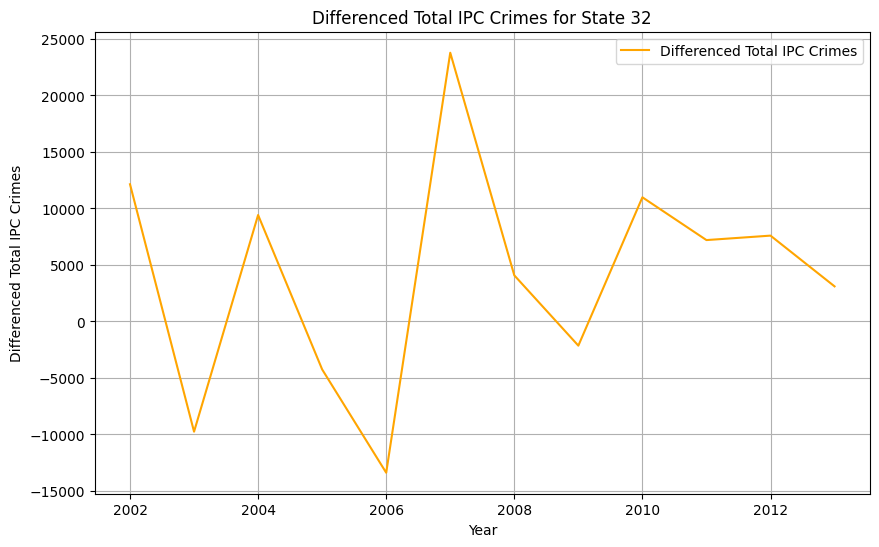

C:\Users\Prakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Prakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Prakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Prakash\AppData\Local\Programs\Python\Pytho

                               SARIMAX Results                                
Dep. Variable:       TOTAL IPC CRIMES   No. Observations:                   12
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -126.137
Date:                Fri, 29 Nov 2024   AIC                            260.275
Time:                        23:43:57   BIC                            262.214
Sample:                             0   HQIC                           259.557
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4064.8324   2431.654      1.672      0.095    -701.122    8830.787
ar.L1          0.0485      1.684      0.029      0.977      -3.251       3.348
ma.L1         -0.5286      1.579     -0.335      0.7

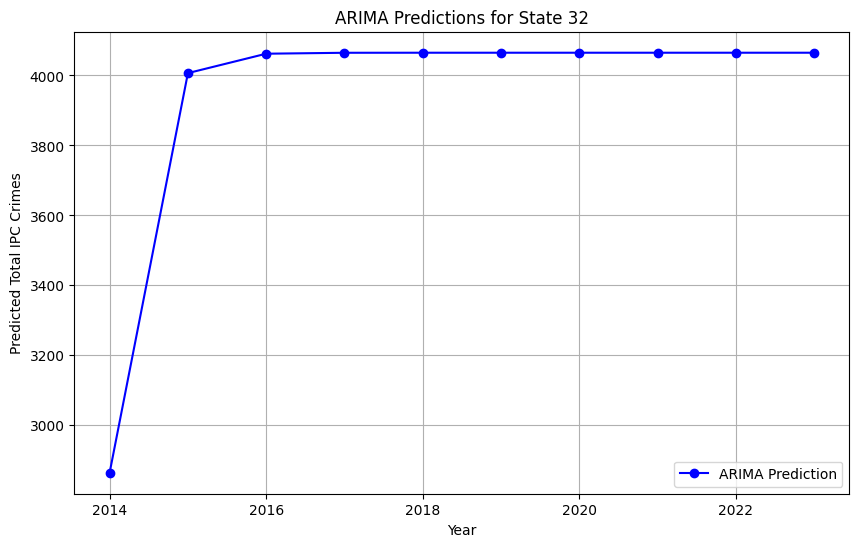

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Select the state and prepare the data
state_selected = 32  # Plug in the STATE code from the above list to get the predictions

arima_data = data[data['STATE/UT'] == state_selected].groupby('YEAR')['TOTAL IPC CRIMES'].sum()

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(arima_data, label='Total IPC Crimes')
plt.title(f"Total IPC Crimes for State {state_selected}")
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.grid(True)
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller (ADF) test to check for stationarity
adf_test = adfuller(arima_data)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# Check if the data is stationary
if adf_test[1] > 0.05:
    print("Data is non-stationary. Differencing will be applied.")
    
    # First differencing
    arima_data_diff = arima_data.diff().dropna()  # First differencing

    # Check stationarity again after differencing
    adf_test_diff = adfuller(arima_data_diff)
    print(f"ADF Statistic (Differenced): {adf_test_diff[0]}")
    print(f"p-value (Differenced): {adf_test_diff[1]}")

    if adf_test_diff[1] > 0.05:
        print("Still non-stationary after differencing. Further differencing required.")
        # Second differencing if still non-stationary
        arima_data_diff = arima_data_diff.diff().dropna()
else:
    print("Data is already stationary.")

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(arima_data_diff, label='Differenced Total IPC Crimes', color='orange')
plt.title(f"Differenced Total IPC Crimes for State {state_selected}")
plt.xlabel('Year')
plt.ylabel('Differenced Total IPC Crimes')
plt.grid(True)
plt.legend()
plt.show()



model = sm.tsa.ARIMA(arima_data_diff, order=(1, 0, 1))  # Adjusted for differenced data
model_fit = model.fit()

# Print the summary of the ARIMA model
print(model_fit.summary())

# Make predictions
start_year = arima_data.index[-1] + 1  # The year after the last data point
arima_pred = model_fit.forecast(steps=10)  # Forecasting for the next 10 years
predicted_years = list(range(start_year, start_year + len(arima_pred)))

# Create a DataFrame to store the predictions
prediction_df = pd.DataFrame({
    'Year': predicted_years,
    'Prediction': arima_pred
})

# Print predictions
print(f"ARIMA Predictions for State {state_selected}:")
print(prediction_df)

# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.plot(prediction_df['Year'], prediction_df['Prediction'], marker='o', color='b', linestyle='-', label='ARIMA Prediction')
plt.title(f"ARIMA Predictions for State {state_selected}")
plt.xlabel('Year')
plt.ylabel('Predicted Total IPC Crimes')
plt.grid(True)
plt.legend()
plt.show()

# Ensure the correct index length when saving to CSV
# The differenced data will have one fewer entry, so adjust for that
corrected_data = pd.DataFrame({
    'Year': arima_data.index[1:],  # Adjust to match the length of differenced data
    'Differenced Total IPC Crimes': arima_data_diff
})

# Save the differenced data and predictions to a CSV file
corrected_data.to_csv('corrected_data.csv', index=False)

# Save predictions to CSV
prediction_df.to_csv('arima_predictions.csv', index=False)


## Crime Trend Estimation Using VAR Model

In this section, we implement the VAR (Vector AutoRegression) model for estimating crime trends. The VAR model is a powerful statistical tool that captures the interdependencies among multiple time series. It allows us to analyze how different types of crimes influence one another over time.

You can run this code directly and then type the name of the state in **capital letters** with the correct spelling to generate predictions. This provides a user-friendly way to explore crime trends for your state of interest, offering deeper insights into the dynamics of crime patterns.


Enter the state for which you want to make predictions:  MADHYA PRADESH


C:\Users\Prakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



Predicted Crime Data for MADHYA PRADESH (2014-2023):
            MURDER  ATTEMPT TO MURDER  \
2014   2691.492285        3024.847659   
2015   1170.752056        2119.968983   
2016   1565.863203        4443.063975   
2017   -538.898995        3243.583444   
2018  -2667.769621        5778.670532   
2019  -6208.063585        7489.421613   
2020 -13105.167958       10238.712840   
2021 -24967.269025       16146.470060   
2022 -43270.236673       24723.918168   
2023 -73768.601589       39570.197943   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER           RAPE  \
2014                                 -46.738532    4344.170469   
2015                                -169.144556    5443.723463   
2016                                -307.492509    7224.024470   
2017                                -550.489576    8528.465028   
2018                               -1384.765612   13041.730217   
2019                               -2052.951795   18151.863332   
2020                            

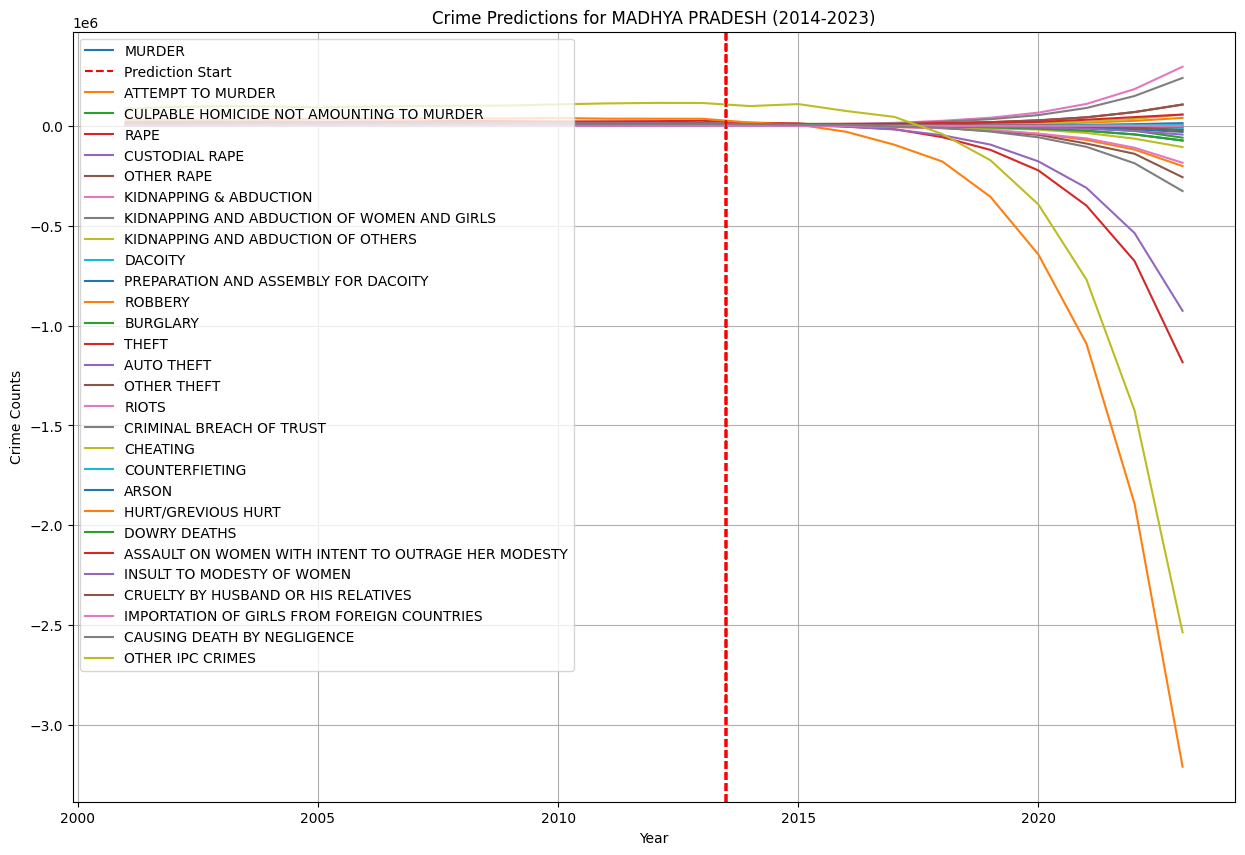

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR


file_path = 'crimes_cleaned.csv'  # Path to the cleaned dataset
data = pd.read_csv(file_path)

# Input: Ask the user to select a state for prediction
selected_state = input("Enter the state for which you want to make predictions: ").strip()

# Filter the dataset for the chosen state
state_data = data[data['STATE/UT'] == selected_state]

# Check if data exists for the selected state
if state_data.empty:
    print(f"No data found for the state '{selected_state}'. Please check the input.")
else:
    # Group data by year and aggregate numerical values
    data_aggregated = state_data.groupby('YEAR').sum(numeric_only=True)

    # Define the columns to use for crime trend prediction
    features = [
        'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
        'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
        'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS',
        'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY',
        'THEFT', 'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
        'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
        'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN',
        'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
        'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES'
    ]

    # Extract training data for the years 2001 to 2013
    train_data = data_aggregated.loc[2001:2013, features]

    # Ensure sufficient training data is available
    if train_data.empty:
        print("Insufficient data for training. Please ensure data from 2001 to 2013 is available.")
    else:
        # Fit a Vector Autoregression (VAR) model
        model = VAR(train_data)
        results = model.fit(maxlags=1)  # Use 1 lag, adjust based on dataset characteristics

        # Generate predictions for the years 2014 to 2023
        forecast = results.forecast(train_data.values, steps=10)
        forecast_df = pd.DataFrame(forecast, index=range(2014, 2024), columns=features)

        # Display the forecasted crime data
        print(f"\nPredicted Crime Data for {selected_state} (2014-2023):")
        print(forecast_df)

        # Combine actual data (up to 2013) with forecasted data (2014 onwards) for visualization
        actual_and_forecast = pd.concat([data_aggregated[features], forecast_df])

        # Visualize the trends using a line plot
        plt.figure(figsize=(15, 10))
        for column in features:
            plt.plot(actual_and_forecast.index, actual_and_forecast[column], label=column)
            # Highlight the prediction period
            plt.axvline(x=2013.5, color='red', linestyle='--', label='Prediction Start' if column == features[0] else None)

        # Add titles, labels, and legend to the plot
        plt.title(f'Crime Predictions for {selected_state} (2014-2023)')
        plt.xlabel('Year')
        plt.ylabel('Crime Counts')
        plt.legend(loc='upper left')
        plt.grid(True)

        # Show the plot
        plt.show()


## National Crime Trend Analysis Using VAR

In this section, we apply the VAR (Vector AutoRegression) model to analyze crime trends across the entire country of India. By aggregating data for all types of crimes, this approach provides a comprehensive view of how crime patterns have evolved nationally. 

The VAR model enables us to capture the interplay between various crime categories over time, offering valuable insights into the overall trend of criminal activities in India. This analysis helps us understand broader patterns and can inform nationwide policy and intervention strategies.


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9397 entries, 0 to 9396
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9397 non-null   object
 1   DISTRICT                                             9397 non-null   object
 2   YEAR                                                 9397 non-null   int64 
 3   MURDER                                               9397 non-null   int64 
 4   ATTEMPT TO MURDER                                    9397 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9397 non-null   int64 
 6   RAPE                                                 9397 non-null   int64 
 7   CUSTODIAL RAPE                                       9397 non-null   int64 
 8   OTHER RAPE                                           9397

C:\Users\Prakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Prakash\AppData\Local\Temp\ipykernel_4332\814581604.py:69: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


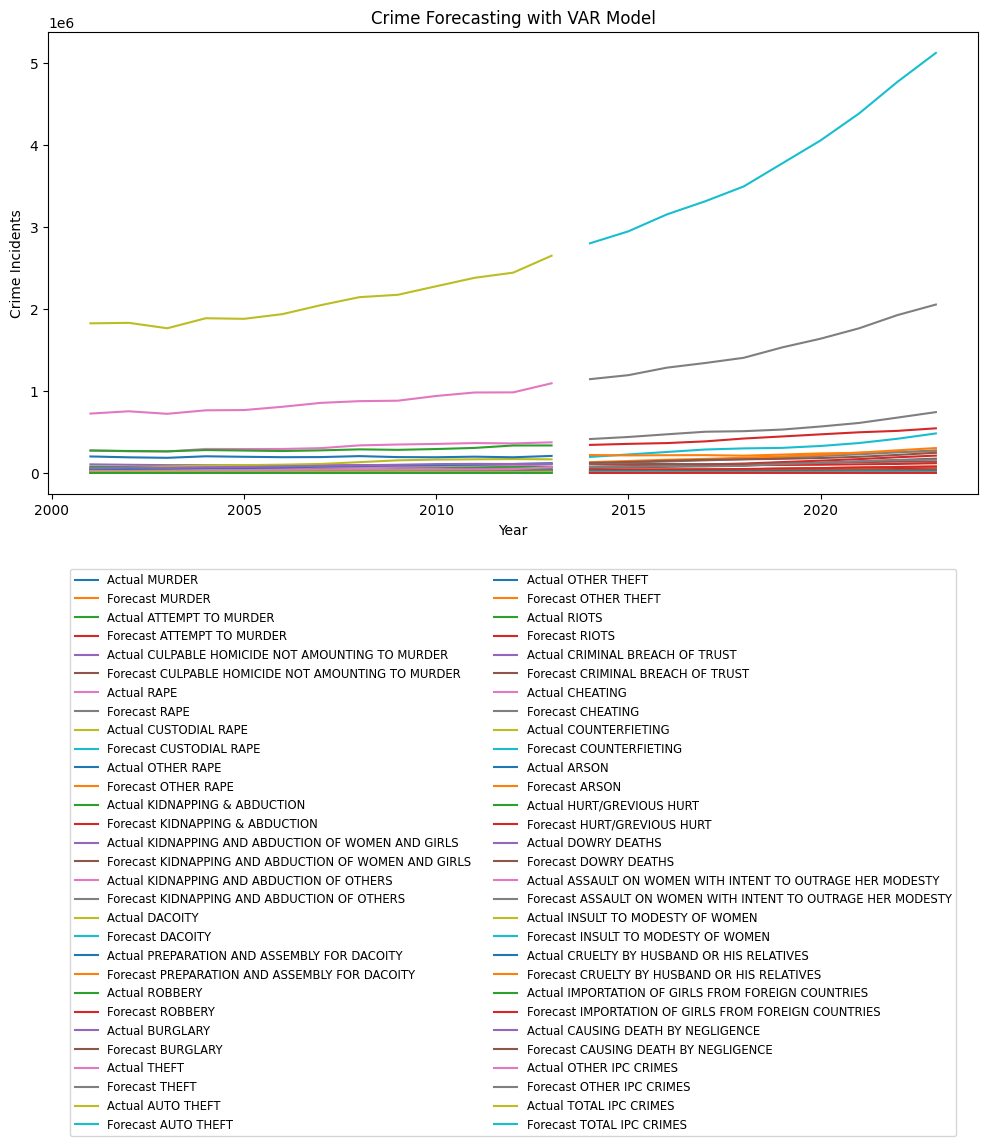


Forecasted Crime Data for 2014-2023:
         MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
0  33804.335214       36803.854117                                3606.239885   
1  33824.342240       38563.741116                                3679.917894   
2  34026.509056       39150.434859                                3657.732417   
3  36177.006608       42138.476249                                3676.719200   
4  36709.765597       46362.001457                                3458.387962   
5  36380.378984       49283.306098                                3113.718311   
6  36510.300022       53200.925094                                3040.743742   
7  35750.442646       56434.166055                                2996.089570   
8  35760.207231       58528.408207                                3023.783876   
9  37652.738479       62726.652760                                3152.112260   

           RAPE  CUSTODIAL RAPE    OTHER RAPE  KIDNAPPING & ABDUCTION 

In [4]:
# Import required libraries
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


file_path = 'crimes_cleaned.csv'  # Path to the cleaned dataset
data = pd.read_csv(file_path)

# Display basic information and a preview of the dataset
print("Dataset Information:")
print(data.info())
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# Aggregate data by year for analysis
yearly_data = data.groupby('YEAR').sum()

#  Select only numeric columns for time series analysis
time_series_data = yearly_data.select_dtypes(include=['int64', 'float64'])

#  Check for stationarity using the Augmented Dickey-Fuller (ADF) Test
def check_stationarity(df):
    """
    Check the stationarity of time series data using the ADF test.
    Returns a DataFrame with ADF statistics and p-values for each column.
    """
    results = {}
    for column in df.columns:
        result = adfuller(df[column])
        results[column] = {'ADF Statistic': result[0], 'p-value': result[1]}
    return pd.DataFrame(results).T

print("\nChecking Stationarity of Time Series Data:")
stationarity_results = check_stationarity(time_series_data)
print(stationarity_results)

#  Apply differencing to handle non-stationary data
# Differencing removes trends to make the data stationary
diff_data = time_series_data.diff().dropna()

#  Fit a Vector Autoregression (VAR) model to the stationary data
model = VAR(diff_data)
fitted_model = model.fit(maxlags=4)  # Fit the model with up to 4 lags (adjustable)

#  7: Forecast crime trends for the next 10 years (2014-2023)
forecast = fitted_model.forecast(diff_data.values[-fitted_model.k_ar:], steps=10)

#  8: Convert forecasted values back to the original scale
# Start by reversing the differencing process
forecast_df = pd.DataFrame(forecast, columns=diff_data.columns)
forecast_cumsum = forecast_df.cumsum()  # Cumulative sum to revert differencing
forecast_original_scale = forecast_cumsum.add(time_series_data.iloc[-1])  # Add last actual value

#  9: Plot actual and forecasted data
plt.figure(figsize=(12, 6))
for column in time_series_data.columns:
    # Plot actual values
    plt.plot(time_series_data.index, time_series_data[column], label=f"Actual {column}")
    # Plot forecasted values
    plt.plot(range(2014, 2024), forecast_original_scale[column], label=f"Forecast {column}")

# Add legend, title, and labels to the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize='small')
plt.title("Crime Forecasting with VAR Model")
plt.xlabel("Year")
plt.ylabel("Crime Incidents")
plt.tight_layout()
plt.show()

#  10: Display forecasted values
print("\nForecasted Crime Data for 2014-2023:")
print(forecast_original_scale)


# Crimes in India: Analyzing Patterns and Predictions (2001-2013)

### Authors:
- Mrunal Pravin Kulkarni (22183)
- Darshana Srivathsan (22001)
- Prakash Kumbhakar (22241)

### Course:
**DSE 315: Data Science in Practice**